In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [ ]:
#Q3

The following function samples from a Multivariate Normal distribution in high dimensions. Calculates the norm of the samples, plots histogram and calculated the mean and sd of the sample norms collected.

In [2]:

def sample(n,d,if_plot, samp_only=True):
#Create mean and cov matrix
  mean = np.zeros(d)
  cov = np.eye(d)

#Sample
  samps = np.random.multivariate_normal(mean, cov, size=n)

#Compute norms
  samp_norms = [LA.norm(i) for i in samps]

  if(if_plot):
    plt.hist(samp_norms, bins='auto')
    plt.title("Histogram of Norm of " +str(d)+" dimensional Gaussian Distribution")
    plt.show()

  mean_samp_norm = np.mean(samp_norms)
  sd_samp_norm = np.std(samp_norms)
  
  if(if_plot):
    print('Mean of Sample Norms = ',mean_samp_norm)
    print('SD of Sample Norms = ',sd_samp_norm)

  if(samp_only):
    return(samp_norms)
  else:
    return([mean_samp_norm, sd_samp_norm])


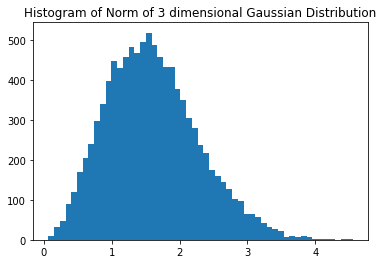

Mean of Sample Norms =  1.6023130723730592
SD of Sample Norms =  0.6745202027009594


[1.6023130723730592, 0.6745202027009594]

In [3]:
#Plot for d = 3 - Just to test the code.

#Specify d, n
d = 3
n = 10000
sample(n=n,d=d,if_plot=True, samp_only=False)

In the following piece of code, we generate samples for different **d**. Later plot the histograms side by side.

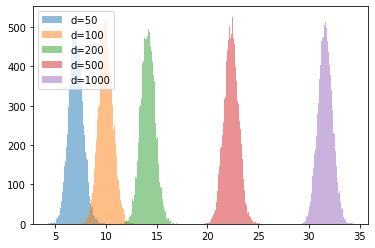

In [ ]:
#Plotting multiple histograms

hlogs = [sample(n=10000,d=d,if_plot=False, samp_only=True) for d in [50,100,200,500,1000]]

plt.hist(hlogs[0], bins='auto', alpha=0.5, label='d=50')
plt.hist(hlogs[1], bins='auto', alpha=0.5, label='d=100')
plt.hist(hlogs[2], bins='auto', alpha=0.5, label='d=200')
plt.hist(hlogs[3], bins='auto', alpha=0.5, label='d=500')
plt.hist(hlogs[4], bins='auto', alpha=0.5, label='d=1000')
plt.legend(loc='upper left')
plt.show()

**Conclusion** - We see that as d increases, the histograms shift towards the right, but the spread of the histograms (sd) remains almost the same. This demonstrates that most samples are picked from near the surface of the hypersphere.

The following plots show that the mean increases as d increases but the SD remains almost the same. Highlighting the curse of dimensionality

In [ ]:
#Collect Stats for d = 50,100,200,500,1000

logs = [sample(n=10000,d=d,if_plot=False) for d in [50,100,200,500,1000]]
logs = np.array(logs)

In [ ]:
logs

[[7.024625790258555, 0.708410778731241],
 [9.967925688252933, 0.7083715004425176],
 [14.128024916179342, 0.7063251285664066],
 [22.341255314313724, 0.708374904006788],
 [31.61906623623292, 0.7122927172490688]]

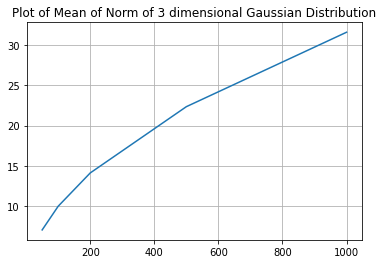

In [ ]:
plt.plot([50,100,200,500,1000],logs[:,0])
plt.title("Plot of Mean of Norm of " +str(d)+" dimensional Gaussian Distribution")
plt.grid(True)
plt.show()

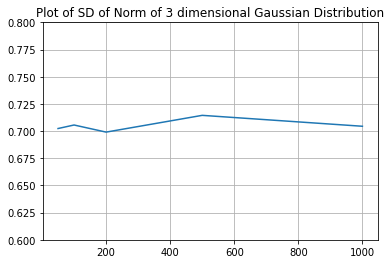

In [ ]:
plt.plot([50,100,200,500,1000],logs[:,1])
plt.title("Plot of SD of Norm of " +str(d)+" dimensional Gaussian Distribution")
plt.ylim((0.6,0.8))
plt.grid(True)
plt.show()

In [ ]:
#Q4

**The Settings for this problem are as follows:**

In [ ]:
n = 10
d = 5000
eps = 0.1

**We perform the following steps:**


*   Sample 10 points
*   Calculate $m$ for $n = 10$ and $\epsilon = 0.1$




In [ ]:
import random
#Create S = n*d matrix from I_{5000*5000}

V = np.eye(d)

#Sample 10 columns
ridx = random.sample(range(1, d), n)
sampa = [ V[j] for j in ridx]

In [ ]:
#Calculate m for n = 10 and eps = 0.1

m_max = np.int(8*np.log(n)/(eps**2))

In [ ]:
m_max

1842

Instantiating an A for initial code testing- This is just to test code. We will later check for the Leamma with various Random A in function check_JL()

In [ ]:
#Create a Random Projection Matrix = A drawn iid from N(0,1/m) 
A = (1/np.sqrt(m_max))*np.random.randn(m_max,d)




*   Calculate distances between all possible pair of points 
*   Calculate Projections
*   Check that the Lemma holds

*Note - The program will flash the message "True" is the Lemmma holds*






In [ ]:
#Code to Check Lemma - We will later use this within a function.

point_pairs = [[i,j] for i in range(10) for j in range(10)]
dists = [ LA.norm(np.subtract(sampa[pair[0]], sampa[pair[1]]))**2 for pair in point_pairs]
projs = [ LA.norm(np.subtract(A@sampa[pair[0]], A@sampa[pair[1]]))**2 for pair in point_pairs]
check = [ (0.9*dists[i] <= projs[i])&(projs[i] <= 1.1*dists[i]) for i in range(10*10)]
np.all(check) #All elements are True

True

The function below takes as input, n=10 datapoints. Generates all possible pairs of points **u,v **. The applies a randomly generated matrix ***A*** to create a random projection. It then checks whether the Johnson-Lindenstrauss Lemma is satisfied or not.

In [ ]:
def check_JL(data,m,d=5000):

  #Generate A
  A = (1/np.sqrt(m))*np.random.randn(m,d)

  #Run the Lemma
  point_pairs = [[i,j] for i in range(10) for j in range(10)] #Select pairs of points from 10 points
  dists = [ LA.norm(np.subtract(data[pair[0]], data[pair[1]]))**2 for pair in point_pairs] #Calculates ||u-v||^2
  projs = [ LA.norm(np.subtract(A@data[pair[0]], A@data[pair[1]]))**2 for pair in point_pairs] #Calculates ||A(u-v)||^2
  check = [ (0.9*dists[i] <= projs[i])&(projs[i] <= 1.1*dists[i]) for i in range(10*10)] #Checks if the Lemma is satisfied for all u,v

  #Return result
  return(np.all(check)) #If all elements are True

As discussed in the class, m is a very loose bound, we actually expect to see the lemma satisfied at much lower dimensions.

Note - The method below checks that the lemma is satisfied for each dimension, by running the code 10 times with a random A each time. It flashes a message True only if the lemma is satisfied for each random A for a given dimension. In case for a dimension, choosing some random A leads to a situation where the lemma is not satisfied, we flash the message False. We notice that for embedding dimension 1700 and above, we are consistently satisying the Lemma

In [ ]:
# Run multiple simulations per m for random A each time - 10 times each

def run_sim(data,m, times=10):
  res = [check_JL(data,m) for j in range(times)]
  return(np.all(res))

#Check the minimum size of m
[run_sim(sampa,m) for m in [1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]]

[False, False, False, False, False, True, True, True]

In [ ]:
#Q5

The following code uses a library called Spacy to read a file and store it as a Spacy Document that we can use to tokenize the file into a vector of words followed by removal of punctuations, spaces and stop words.

In [5]:
import numpy as np
import math
import spacy

nlp = spacy.load("en_core_web_sm")

def open_file(file_name):
  with open(file_name, 'r') as file:
    data = file.read().replace('\n', '')

  doc = nlp(data.lower())
  return(doc)

#Create Spacy Objects
d1 = open_file('d1.txt')
d2 = open_file('d2.txt')
d3 = open_file('d3.txt')
d4 = open_file('d4.txt')
d5 = open_file('d5.txt')
dq = open_file('d_query.txt')



We create a vector of Document Frequency for each document after removing punctuations, spaces and stop words.

In [6]:
def create_df(nlp_doc):
  # Create a vector of words
  doc_1 = [token.orth_ for token in nlp_doc if not token.is_punct | token.is_space | token.is_stop]

  #Create a dictionary of DF i.e. {word : count}
  return(dict((x,doc_1.count(x)) for x in set(doc_1)))


c1 = create_df(d1)
c2 = create_df(d2)
c3 = create_df(d3)
c4 = create_df(d4)
c5 = create_df(d5)
cq = create_df(dq)

#Create Corpus by combining all the documents - List of dictionaries.
df_corp = [c1,c2,c3,c4,c5,cq]


The following method calculates the TF-IDF vector for each document and query. Notice that the word Java occurs everywhere i.e. documents and query, therefore its TF-IDF score is zero.

In [7]:
def create_df_idf(nlp_doc, corpus):

  N = len(corpus) #Total Number of docs
  dic = {}

  #For each dictionary in corpus for each word in dictionary find match with other dictionaries.
  for word in nlp_doc.keys():
    presence = sum([1 if word in doc.keys() else 0 for doc in corpus]) #See if a given word in a document is present in any other documents in corpus
    IDF = np.log(N/presence) #Calculates Inverse Document Frequency
    dic[word] = IDF*nlp_doc[word] #Multiplies IDF*DF for each word in the document

  #Return the TF-IDF as a dictionary {word : TF-IDF}
  return(dic)


i1 = create_df_idf(c1,df_corp)
i2 = create_df_idf(c2,df_corp)
i3 = create_df_idf(c3,df_corp)
i4 = create_df_idf(c4,df_corp)
i5 = create_df_idf(c5,df_corp)
iq = create_df_idf(cq,df_corp)


In [8]:
#Method to Compute cosine similarity between a tfidf vectors of document and query

def cosine_sim(doc,query):
  doc_norm = np.sqrt(np.sum([val**2 for val in doc.values()])) #TF_IDF norm of document
  q_norm = np.sqrt(np.sum([val**2 for val in query.values()])) #TF_IDF norm of query

  dpk = []
  for key in query.keys():
    if key in doc.keys():
      dpk.append(query[key]*doc[key]) #Compute the dotproduct - Numerator

  return(sum(dpk)/(doc_norm*q_norm)) #Compute and return Cosine Distance

Call this method on all documents and check the cosine similarity of each document with the query

In [9]:
cosine_sim(i1,iq)

0.0

In [10]:
cosine_sim(i2,iq)

0.0

In [11]:
cosine_sim(i3,iq)

0.0

In [12]:
cosine_sim(i4,iq)

0.2282556502512401

In [13]:
cosine_sim(i5,iq)

0.0

**Conclusion** - This shows that Document 4 is the closest match with the query